In [64]:
import numpy as np
import time
import matplotlib.pyplot as plt

def jacobi(A, b, x0, tolerance, max_iterations):
    n = len(b)
    x = x0.copy()
    convergence = np.array([])
    for k in range(max_iterations):
        x_new = np.zeros_like(x)
        for i in range(n):
            s = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i][i]
        # Check for convergence
        convergence = np.append(convergence, np.linalg.norm(x_new - x, ord=np.inf))
        if np.linalg.norm(x_new - x, ord=np.inf) < tolerance:
            return x_new, k, convergence
        x = x_new
    return x, max_iterations, convergence

In [65]:
def gauss_seidel(A, b, x0, tolerance, max_iterations):
    n = len(b)
    x = x0.copy()
    convergence = np.array([])
    for k in range(max_iterations):
        x_new = x.copy()
        for i in range(n):
            s1 = sum(A[i][j] * x_new[j] for j in range(i)) # Using already updated values
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, n)) # Using old values
            x_new[i] = (b[i] - s1 - s2) / A[i][i]
        # Check for convergence
        convergence = np.append(convergence, np.linalg.norm(x_new - x, ord=np.inf))
        if np.linalg.norm(x_new - x, ord=np.inf) < tolerance:
            return x_new, k, convergence
        x = x_new
    return x, max_iterations, convergence

In [76]:
def plot(jacobiIterations, jacobiConvergence, gaussIterations, gaussConvergence, tolerance):
    plt.plot(range(jacobiIterations+1), jacobiConvergence, 'r.')
    plt.xlabel('Iterations')
    plt.ylabel('Convergence')
    plt.title(f"Jacobi Tolerance: {tolerance}")
    plt.show()
    
    plt.plot(range(gaussIterations+1), gaussConvergence, 'g.')
    plt.xlabel('Iterations')
    plt.ylabel('Convergence')
    plt.title(f"Gauss-Seidel Tolerance: {tolerance}")
    plt.show()
    
    print(f"Jacobi Iterations: {jacobiIterations}")
    print(f"Gauss-Seidel Iterations: {gaussIterations}")

In [77]:
A = np.array([[3, -0.1, -0.2],
              [0.1, 7, -0.3],
              [0.3, -0.2, 10]], dtype = float)
b = np.array([7.85, -19.3, 71.4], dtype = float)
x0 = np.zeros_like(b)
tolerance1 = 1e-3
tolerance2 = 1e-6
tolerance3 = 1e-9
maxIterations = 100

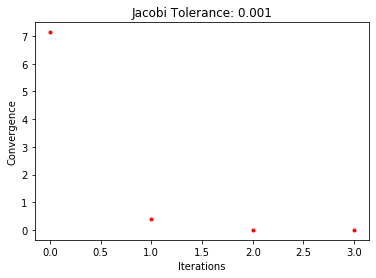

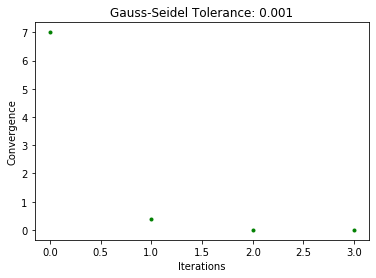

Jacobi Iterations: 3
Gauss-Seidel Iterations: 3


In [78]:
jacobiSolution1, jacobiIterations1, jacobiConvergence1 = jacobi(A,b,x0,tolerance1,maxIterations)
gaussSolution1, gaussIterations1, gaussConvergence1 = gauss_seidel(A,b,x0,tolerance1,maxIterations)
plot(jacobiIterations1, jacobiConvergence1, gaussIterations1, gaussConvergence1, tolerance1)

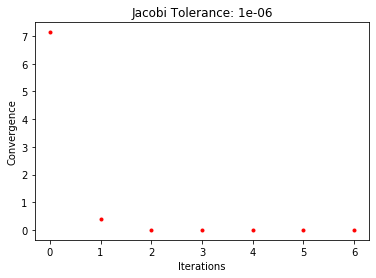

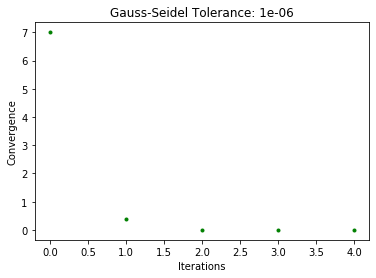

Jacobi Iterations: 6
Gauss-Seidel Iterations: 4


In [79]:
jacobiSolution2, jacobiIterations2, jacobiConvergence2 = jacobi(A,b,x0,tolerance2,maxIterations)
gaussSolution2, gaussIterations2, gaussConvergence2 = gauss_seidel(A,b,x0,tolerance2,maxIterations)
plot(jacobiIterations2, jacobiConvergence2, gaussIterations2, gaussConvergence2, tolerance2)

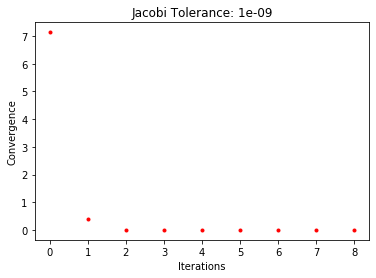

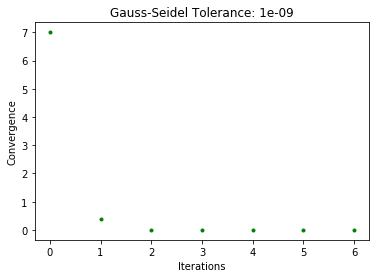

Jacobi Iterations: 8
Gauss-Seidel Iterations: 6


In [80]:
jacobiSolution3, jacobiIterations3, jacobiConvergence3 = jacobi(A,b,x0,tolerance3,maxIterations)
gaussSolution3, gaussIterations3, gaussConvergence3 = gauss_seidel(A,b,x0,tolerance3,maxIterations)
plot(jacobiIterations3, jacobiConvergence3, gaussIterations3, gaussConvergence3, tolerance3)

As the tolerance approaches 0, the nummber of iterations needed for convergence increases.